In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as stats
import numpy as np

In [2]:
data = pd.read_csv('COGS109_Stroke.csv')

# Drop rows with null values
data = data.dropna()

# Filter out rows wher stroke = 1
# Length = 209
stroke = data[data['stroke'] == 1]
not_stroke = data[data['stroke'] == 0]

# Randomly smaple 209 data points from not stroke to balance data set
not_stroke = not_stroke.sample(n = 209,random_state = 1)

data = stroke.append(not_stroke)

In [3]:
data['Female'] = np.where(data['gender'] == 'Female',1,0)
data['Male'] = np.where(data['gender'] == 'Male', 1,0)
#data.pop(data['gender'])

data['Married'] = np.where(data['ever_married'] == 'Yes',1,0)
data['NotMarried'] = np.where(data['ever_married'] == 'No',1,0)
#data.pop(data['ever_married'])

data['Private'] = np.where(data['work_type'] == 'Private',1,0)
data['SelfEmp'] = np.where(data['work_type'] == 'Self-employed',1,0)
data['Gov'] = np.where(data['work_type'] == 'Govt_job',1,0)
data['Child'] = np.where(data['work_type'] == 'children',1,0)
#data.pop(data['work_type'])

data['Urban'] = np.where(data['Residence_type'] == 'Urban', 1,0)
data['Rural'] = np.where(data['Residence_type'] == 'Rural', 1,0)
#data.pop(data['Residence_type'])

data['NeverSmoke'] = np.where(data['smoking_status'] == 'never smoked',1,0)
data['FormalSmoke'] = np.where(data['smoking_status'] == 'formally smoked',1,0)
data['UnknownSmoke'] = np.where(data['smoking_status'] == 'Unknown',1,0)
data['Smokes'] = np.where(data['smoking_status'] == 'smokes',1,0)
#data.pop(data['smoking_status'])
data.rename(columns={'heart_disease': 'HeartDisease'}, inplace=True)
data.rename(columns={'avg_glucose_level': 'AvgGlucoseLevel'}, inplace=True)


In [4]:
#data.pop(data['gender'])
data.drop(['gender','ever_married','work_type','Residence_type','smoking_status','FormalSmoke','id','Male','NotMarried','NeverSmoke'], axis = 1,inplace = True)

In [5]:
data.columns

Index(['age', 'hypertension', 'HeartDisease', 'AvgGlucoseLevel', 'bmi',
       'stroke', 'Female', 'Married', 'Private', 'SelfEmp', 'Gov', 'Child',
       'Urban', 'Rural', 'UnknownSmoke', 'Smokes'],
      dtype='object')

In [6]:
len(data.columns)

16

In [7]:
# Move stroke column to end
col = data.pop(data.columns[5])
data.insert(15,'stroke',col)

In [8]:
# Shuffle dataset
data = data.sample(frac = 1,random_state = 2)

In [9]:
data.head()

,age,hypertension,HeartDisease,AvgGlucoseLevel,bmi,Female,Married,Private,SelfEmp,Gov,Child,Urban,Rural,UnknownSmoke,Smokes,stroke
179,81.0,0,0,213.22,26.1,0,1,1,0,0,0,1,0,1,0,1
1893,54.0,0,1,222.46,35.7,0,1,0,0,1,0,1,0,0,0,0
232,73.0,0,0,70.94,34.4,1,1,0,1,0,0,1,0,0,0,1
554,5.0,0,0,71.43,19.3,0,0,0,0,0,1,0,1,1,0,0
226,81.0,0,0,184.40,27.5,1,1,1,0,0,0,0,1,0,0,1


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
train = data[:336]
test = data[336:]

In [12]:
features = []
model_acc1 = {}
p_lst = []
acc1 = []

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
# Function for bayesian approach
def bayes(column,threshold):
    result = []
    for num in column:
        if num > threshold:
            result.append(1)
        else:
            result.append(0)
    return result

In [15]:
for p in data.columns:
        
        if p == 'stroke':
            continue
       
        model_1 = stats.logit(formula = 'stroke~'+ p,data = train).fit()
        pred_1 = model_1.predict(test[p])
        b_result = bayes(pred_1,.5)
        
        tn1,fp1,fn1,tp1 = confusion_matrix(test['stroke'],b_result).ravel()
        accuracy1 = (tp1 + tn1)/( tn1 + fp1 + fn1 + tp1)
   
        model_acc1.update({p:accuracy1})
        
        
print(model_acc1)

feature1 = max(model_acc1,key = model_acc1.get)
features.append(feature1)
print(feature1)
acc1.append(model_acc1[feature1])

Optimization terminated successfully.
         Current function value: 0.480234
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.663594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.658298
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.643882
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.687127
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692856
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.640999
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692687
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.677250
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692811
  

In [16]:
print(features)

['age']


In [17]:

# Stepwise selection using logistic regression


# Find feature 1
formula2 = 'stroke~age'
for i in range(4):

    model_acc = {}
    for p in data.columns:
        if p == 'stroke':
            continue
        if p in features:
            continue
        model_2 = stats.logit(formula = formula2,data = train).fit()
        pred_2 = model_2.predict(test[features])
        b_result2 = bayes(pred_2,.5)
   
        tn,fp,fn,tp = confusion_matrix(test['stroke'],b_result2).ravel()
        accuracy = (tp + tn)/( tn + fp + fn + tp)
        model_acc.update({p:accuracy})
        
    #Find model with highest accuracy    

    feature2 = max(model_acc,key = model_acc.get)
    features.append(feature2)
    formula2 += '+'
    formula2 += feature2
    acc1.append(model_acc[feature2])
    

Optimization terminated successfully.
         Current function value: 0.480234
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480234
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480234
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480234
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480234
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480234
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480234
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480234
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480234
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480234
  

In [18]:
print(features)
print(model_acc)

['age', 'hypertension', 'HeartDisease', 'AvgGlucoseLevel', 'bmi']
{'bmi': 0.7926829268292683, 'Female': 0.7926829268292683, 'Married': 0.7926829268292683, 'Private': 0.7926829268292683, 'SelfEmp': 0.7926829268292683, 'Gov': 0.7926829268292683, 'Child': 0.7926829268292683, 'Urban': 0.7926829268292683, 'Rural': 0.7926829268292683, 'UnknownSmoke': 0.7926829268292683, 'Smokes': 0.7926829268292683}


In [19]:
print(acc1)

[0.7926829268292683, 0.7926829268292683, 0.8048780487804879, 0.8170731707317073, 0.7926829268292683]


Text(0.5, 0, 'Number of Features')

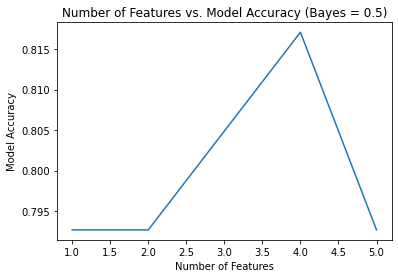

In [20]:
plt.plot(range(1,6),acc1)
plt.title('Number of Features vs. Model Accuracy (Bayes = 0.5)')
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Features')

In [21]:
final_formula = 'stroke~age + hypertension + HeartDisease + AvgGlucoseLevel'
model_final = stats.logit(formula = final_formula,data = train).fit()
model_final.summary()


Optimization terminated successfully.
         Current function value: 0.463377
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                  336
Model:                          Logit   Df Residuals:                      331
Method:                           MLE   Df Model:                            4
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                  0.3312
Time:                        19:12:40   Log-Likelihood:                -155.69
converged:                       True   LL-Null:                       -232.80
Covariance Type:            nonrobust   LLR p-value:                 2.542e-32
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.9352      0.613     -8.056      0.000      -6.136      -3.735
age                 0.0729      0.009      7.894      0.000       0.055       0.091
hypertension        0.6727      0.407      1.653      0.098      -0.125       1.471
HeartDisease        0.5652      0.503      1.124      0.261      -0.420       1.551
AvgGlucoseLevel     0.0051      0.003      1.853      0.064      -0.000       0.010
===================================================================================
"""

The results are inconclusive the model above has the highest accuracy, most of the parameters are not significant.
<br> <br>
 It is possible that the predictor age has a larger effect size than the others and we only had the power to detect this difference. The other predictors might have a lower effect size and only with a larger sample size can they be detected.
<br> <br>
In the future it might be fruitful to run the model on a larger data set so we can have the statistical power to detect true effects.